In [ ]:
### Load relevant packages
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import os

%matplotlib inline
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls
df = pd.read_csv('/content/drive/Shared drives/Data Science for All - Womens Summit/Data/US Crunchbase Companies.csv')
df.head()

Mounted at /content/drive
drive  sample_data


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,18,26,28,32,33,34,38,39,41,42,43,44,45,46,53,56,74,76,78,82,83,90,94,96,97,101,102,103,104,105,107,108,109,110,111,112,114,115,118,120) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Index,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Total Funding Amount,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Founded Date,Founded Date Precision,Headquarters Regions,Diversity Spotlight (US Only),Estimated Revenue Range,Operating Status,Full Description,Hub Tags,Number of Articles,Phone Number,Contact Email,LinkedIn,Facebook,Twitter,Website,Company Type,Closed Date,Closed Date Precision,Exit Date,Exit Date Precision,Investor Type,Investment Stage,Number of Portfolio Organizations,Number of Investments,Number of Lead Investments,Number of Diversity Investments,Number of Exits,Number of Exits (IPO),Accelerator Program Type,Accelerator Application Deadline,...,IPO Status,IPO Date,Delisted Date,Delisted Date Precision,Money Raised at IPO,Money Raised at IPO Currency,Money Raised at IPO Currency (in USD),Valuation at IPO,Valuation at IPO Currency,Valuation at IPO Currency (in USD),Stock Symbol,Stock Symbol URL,Stock Exchange,Last Leadership Hiring Date,Number of Events,CB Rank (Organization),CB Rank (School),Trend Score (7 Days),Trend Score (30 Days),Trend Score (90 Days),SEMrush - Monthly Visits,SEMrush - Average Visits (6 months),SEMrush - Monthly Visits Growth,SEMrush - Visit Duration,SEMrush - Visit Duration Growth,SEMrush - Page Views / Visit,SEMrush - Page Views / Visit Growth,SEMrush - Bounce Rate,SEMrush - Bounce Rate Growth,BuiltWith - Active Tech Count,Apptopia - Number of Apps,Apptopia - Downloads Last 30 Days,G2 Stack - Total Products Active,IPqwery - Patents Granted,IPqwery - Trademarks Registered,IPqwery - Most Popular Trademark Class,IPqwery - Most Popular Patent Class,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD)
0,1,Apr 57th,https://www.crunchbase.com/organization/apr57-...,"E-Commerce, Fashion, Retail, Sports","New York, New York, United States",Pavels Lisovskis opened up a Retail stamp and ...,"383,462",NaN,NaN,NaN,NaN,NaN,"Greater New York Area, East Coast, Northeaster...",NaN,NaN,Active,Pavels Lisovskis opened up a Retail stamp and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://apr57.com/,For Profit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"411,676",NaN,-0.4,-0.6,-0.8,"1,910","1,225.17",34.51%,67,97.06%,3.45,-28.65%,0%,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,A & A 1st Choice LLC,https://www.crunchbase.com/organization/a-a-1s...,"Building Material, Real Estate","Round Rock, Texas, United States","We are a Round Rock, TX based company that has...","659,912",NaN,NaN,NaN,1/1/2001,year,Southern US,NaN,$1M to $10M,Active,"We are a Round Rock, TX (serving all surroundi...",NaN,NaN,(512) 767-2935,aa1stchoice512@gmail.com,NaN,https://www.facebook.com/aa1stchoicellc,NaN,http://www.aa1stchoice.com/,For Profit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"703,273",NaN,-0.2,-0.2,-0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,A & A Auto Recycling,https://www.crunchbase.com/organization/a-a-au...,Automotive,"Bradenton, Florida, United States","Used Auto Parts Store in Bradenton, FL","1,011,536",NaN,NaN,NaN,NaN,NaN,"East Coast, Southern US",NaN,NaN,Active,"Address: 5507 9th St E, Bradenton, FL 34203, USA",NaN,NaN,941-751-2690,NaN,NaN,NaN,NaN,http://aaautorecycling.com,For Profit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,073,940",NaN,0.0,-0.1,-0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,A & A Custom Cornhole,https://www.crunchbase.com/organization/a-a-cu...,"Recreation, Sports","Durham, North Carolina, United States",We provide Custom Corn Hole Boards for custome...,"584,729",NaN,NaN,NaN,9/1/2013,day,"Research Triangle, East Coast, Southern US",NaN,Less than $1M,Active

In [ ]:
df.columns.values

array(['Index', 'Organization Name', 'Organization Name URL',
       'Industries', 'Headquarters Location', 'Description',
       'CB Rank (Company)', 'Total Funding Amount',
       'Total Funding Amount Currency',
       'Total Funding Amount Currency (in USD)', 'Founded Date',
       'Founded Date Precision', 'Headquarters Regions',
       'Diversity Spotlight (US Only)', 'Estimated Revenue Range',
       'Operating Status', 'Full Description', 'Hub Tags',
       'Number of Articles', 'Phone Number', 'Contact Email', 'LinkedIn',
       'Facebook', 'Twitter', 'Website', 'Company Type', 'Closed Date',
       'Closed Date Precision', 'Exit Date', 'Exit Date Precision',
       'Investor Type', 'Investment Stage',
       'Number of Portfolio Organizations', 'Number of Investments',
       'Number of Lead Investments', 'Number of Diversity Investments',
       'Number of Exits', 'Number of Exits (IPO)',
       'Accelerator Program Type', 'Accelerator Application Deadline',
       'Accelera

In [ ]:
df_women = df[df['Diversity Spotlight (US Only)'].astype(str).str.contains("Women")]
len(df)
# total number of women founded businesses in our data
# len(df_women)

109043

In [ ]:
# percentage of women founded businesses in our data
# len(df_women)/len(df)

In [ ]:
# total funding amount for women founded businesses in our data
women_total_funding = df_women['Total Funding Amount Currency (in USD)'].astype('float').sum()
# women_total_funding

In [ ]:
# number of women founded businesses that raised 0 funding
women_funding_zero = df_women['Total Funding Amount Currency (in USD)'].isnull().sum()
women_funding_zero

3662

In [ ]:
# number of women founded businesses with non-zero founding amount
women_funding_non_zero = df_women['Total Funding Amount Currency (in USD)'].dropna()
len(women_funding_non_zero)

2357

In [ ]:
# number of women founded businesses that receive some funds but less than 200k
type(women_funding_non_zero.astype('float')  < 200000.0)
women_funding_nonzero_200K = women_funding_non_zero.where(women_funding_non_zero.astype('float')  >= 200000.0).isnull().sum()
women_funding_nonzero_200K

397

In [ ]:
# total number of women founded businesses that either receive no funds or receive funds less than 200K
women_funding_200K = women_funding_zero + women_funding_nonzero_200K
women_funding_200K

4059

In [ ]:
# percentage of women founded businesses that either receive no funds or receive funds less than 200K
percent_women_funding_200K = women_funding_200K / len(df_women)
percent_women_funding_200K

0.6743645123774713

In [ ]:
women_revenue_non_zero = df_women['Estimated Revenue Range'].dropna()
# number of women founded businesses that have less than 1M estimated revenue
women_revenue_less_1M = women_revenue_non_zero.where(women_revenue_non_zero != 'Less than $1M').isnull().sum()
women_revenue_less_1M

1758

In [ ]:
# percentage of women founded businesses that have less than 1M estimated revenue
women_revenue_less_1M / len(women_revenue_non_zero)

0.4579317530606929

In [ ]:
print("Total number of women founded/led businesses:\n", len(df_women))
print("Percentage of women founded/led businesses:\n", len(df_women)/len(df))
print("Number of women founded/led businesses that raised 0 funding:\n", women_funding_zero)
print("Number of women founded/led businesses that receive some funds but less than 200k:\n", women_funding_nonzero_200K)
print("Total number of women founded/led businesses that either receive no funds or receive funds less than 200K:\n", women_funding_200K)
print("Percentage of women founded/led businesses that either receive no funds or receive funds less than 200K:\n", percent_women_funding_200K)
print("Number of women founded/led businesses that have non-empty estimated revenue:\n", len(women_revenue_non_zero))
print("Number of women founded/led businesses that have less than 1M estimated revenue:\n", women_revenue_less_1M)
print("Percentage of women founded/led businesses that have less than 1M estimated revenue:\n", women_revenue_less_1M / len(women_revenue_non_zero))

Total number of women founded/led businesses:
 6019
Percentage of women founded/led businesses:
 0.05519840796749906
Number of women founded/led businesses that raised 0 funding:
 3662
Number of women founded/led businesses that receive some funds but less than 200k:
 397
Total number of women founded/led businesses that either receive no funds or receive funds less than 200K:
 4059
Percentage of women founded/led businesses that either receive no funds or receive funds less than 200K:
 0.6743645123774713
Number of women founded/led businesses that have non-empty estimated revenue:
 3839
Number of women founded/led businesses that have less than 1M estimated revenue:
 1758
Percentage of women founded/led businesses that have less than 1M estimated revenue:
 0.4579317530606929


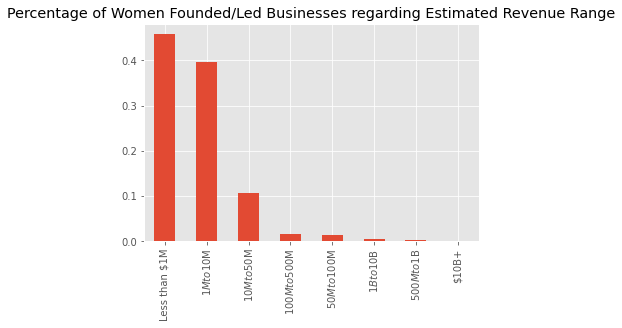

In [ ]:
# plot for estimated revenue range of women founded/led businesses
plot = df_women['Estimated Revenue Range'].value_counts(normalize=True).plot.bar().set_title('Percentage of Women Founded/Led Businesses regarding Estimated Revenue Range')